In [64]:
%matplotlib inline
from pycocotools.coco import COCO
import pycocotools.mask as maskapi
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [65]:
dataDir='..'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [66]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.61s)
creating index...
index created!


In [67]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
indoor outdoor vehicle animal electronic sports furniture kitchen person accessory food appliance


In [71]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','pizza']);
imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

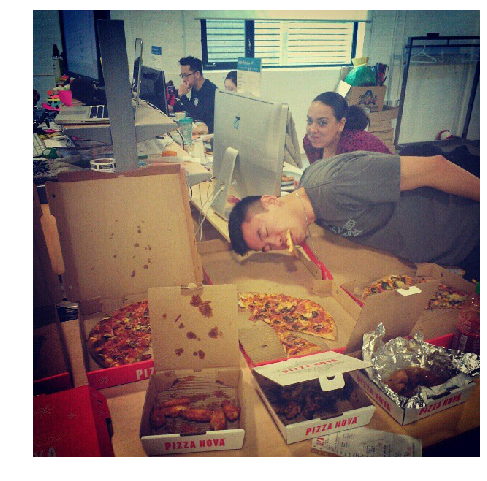

In [72]:
# load and display image
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
#I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

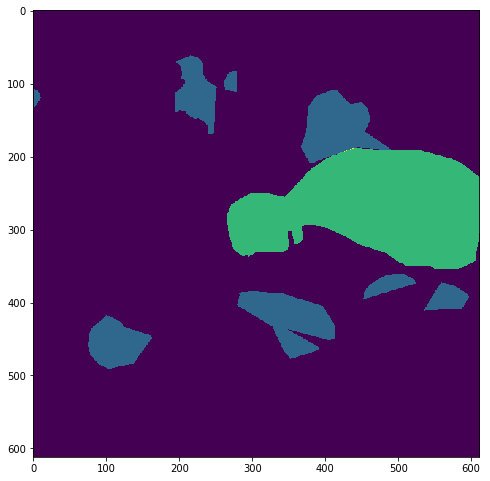

In [78]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

plt.imshow(mask)

In [81]:
#Testing Union Box
o = _mask.iou( coco, mask,10 )

ValueError: Buffer has wrong number of dimensions (expected 1, got 0)

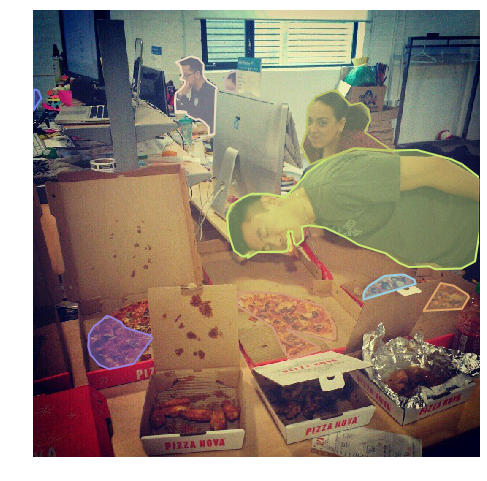

In [73]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [74]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.19s)
creating index...
index created!


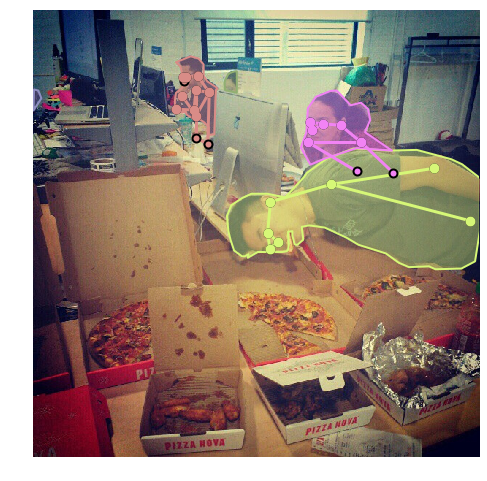

In [75]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [76]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


A man eating pizza without using his hands.
some people in an office and then male is eating pizza
A man eating pizza from pizza boxes on top of tables.
People sitting at a table with computers, pizza boxes, and chicken wings.
A man leaning his head in a box of pizza with some pizza in his mouth.


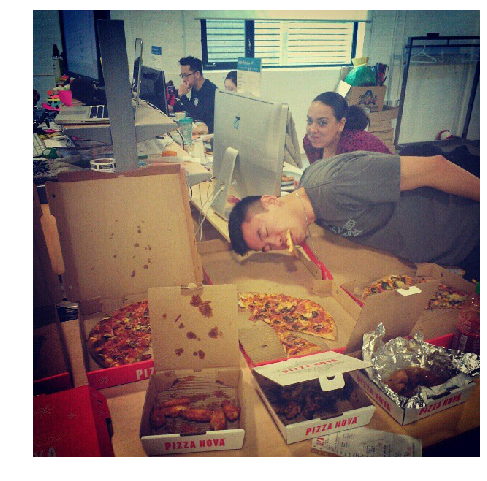

In [77]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

In [82]:
def get_mask(imgId, idx=0):
    """Get mask for idx'th person in this imgId."""
    img = coco.loadImgs(imgId)[0]
    filename="%012d.jpg"%imgId
    I = io.imread(dataDir + 'images/' + dataType +'/'+filename) #I = io.imread(img['coco_url'])
    # plt.imshow(I); plt.axis('off')

    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=False)
    anns = coco.loadAnns(annIds)
    if idx >= len(anns):
        return None, None

    ann = anns[idx]
    bb = ann['bbox']
    x1, x2, y1, y2 = [int(bb[0]), int(bb[0]+bb[2]), int(bb[1]), int(bb[1]+bb[3])]

    mask=coco.annToMask(ann)
    
    if len(I.shape) < 3:
        # Let's not worry about black and white images.
        return None, None
    img = I[y1:y2, x1:x2, :]
    mask = np.array(mask[y1:y2, x1:x2])
    return img, mask

In [83]:
def get_iou(mask1, mask2):
    """Get IOU of two binary segmentation masks."""
    rle1 = maskapi.encode(np.asfortranarray(mask1))
    rle2 = maskapi.encode(np.asfortranarray(mask2))
    return maskapi.iou([rle1], [rle2], [0])[0, 0]

def show_im_and_mask(img, mask):
    """Display image and mask."""
    plt.figure()

    plt.subplot(1, 2, 1)
    plt.imshow(img)

    plt.subplot(1, 2, 2)
    plt.imshow(mask)
    plt.show()

In [84]:
mask1 = get_mask(img)

KeyError: 'license'